In [2]:
options(repr.plot.width=4, repr.plot.height=3)
require(pheatmap)
require(data.table)
require(tidyverse)

## 1. load data

In [3]:
dat.pro_ps.wd<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed_dy.txt")%>%
    group_by(celltype)%>%spread(key = bin,value = percent_open)
dat.pro_ps.raw <- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_raw_dy.txt")

head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAAS_28691,alpha,4.931862,5.279896,5.615049,5.937014,6.245485,6.540155,6.820720,7.086871,⋯,9.029019,9.411283,9.808789,10.22147,10.64927,11.09211,11.54993,12.02267,12.51026,13.01264
AAED1_127544,alpha,7.403185,7.951997,8.479571,8.985074,9.467674,9.926540,10.360838,10.769737,⋯,19.584405,20.179108,20.785223,21.40308,22.03302,22.67537,23.33046,23.99862,24.68020,25.37551
AAGAB_42733,alpha,3.864166,4.456874,5.031414,5.587616,6.125312,6.644332,7.144508,7.625671,⋯,20.241210,21.036159,21.855849,22.70039,23.56989,24.46446,25.38421,26.32924,27.29968,28.29562
AAMDC_22628,alpha,12.633671,13.011864,13.374943,13.722367,14.053593,14.368079,14.665283,14.944664,⋯,30.946721,32.434447,33.976189,35.57119,37.21869,38.91794,40.66818,42.46864,44.31858,46.21724
AAMP_80793,alpha,24.453963,24.010923,23.577695,23.154637,22.742109,22.340468,21.950074,21.571287,⋯,18.184864,18.748109,19.334831,19.94480,20.57780,21.23358,21.91194,22.61263,23.33543,24.08012
AASDHPPT_23418,alpha,50.059457,49.249510,48.454370,47.674779,46.911476,46.165201,45.436695,44.726698,⋯,42.583230,44.544440,46.589766,48.71784,50.92729,53.21676,55.58487,58.03025,60.55154,63.14737


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSWIM8_14081,alpha,5.310967,5.699959,6.074699,6.434845,6.780055,7.109988,7.424301,7.722653,⋯,12.82396,13.16084,13.50228,13.84875,14.20070,14.55859,14.92286,15.29399,15.67241,16.05860
ZUFSP_112980,alpha,2.099763,2.438252,2.765211,3.080644,3.384554,3.676944,3.957819,4.227180,⋯,11.72306,12.53383,13.37696,14.25206,15.15875,16.09663,17.06533,18.06445,19.09361,20.15241
ZXDC_94748,alpha,8.506410,9.089628,9.653701,10.198114,10.722354,11.225909,11.708265,12.168908,⋯,20.73449,21.34025,21.96678,22.61400,23.28182,23.97015,24.67890,25.40801,26.15737,26.92690
ZYX_119844,alpha,25.661146,25.289388,24.922469,24.560689,24.204347,23.853740,23.509167,23.170928,⋯,29.49011,30.82080,32.20004,33.62727,35.10195,36.62352,38.19145,39.80519,41.46418,43.16788
ZZEF1_52568,alpha,2.762239,3.213540,3.648379,4.066344,4.467028,4.850022,5.214915,5.561301,⋯,16.55262,17.52582,18.53330,19.57470,20.64968,21.75790,22.89900,24.07264,25.27848,26.51617
ZZZ3_5178,alpha,12.659186,13.067399,13.461382,13.840516,14.204182,14.551759,14.882628,15.196170,⋯,34.54294,36.05516,37.62459,39.25023,40.93107,42.66612,44.45436,46.29479,48.18640,50.12820


[1] 6397  102


alpha  beta 
 5450   947 

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [4]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='alpha')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

Loading required package: fpc


### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
  259  5191 

2  clusters  0.4160179 
3  clusters  0.3219384 
4  clusters  0.3463152 
5  clusters  0.3157164 
6  clusters  0.2759119 
7  clusters  0.2495967 
8  clusters  0.2161573 
9  clusters  0.2317477 
10  clusters  0.2301516 



   1    2 
2472 2719 

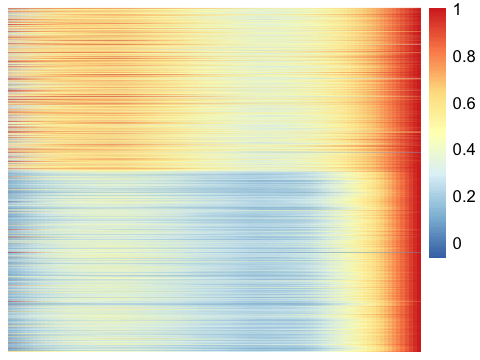

In [5]:
tr.keep <- apply(dat.sub,1,max)>=10
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
                           
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
                           

### Subclustering 

2  clusters  0.3717201 
3  clusters  0.3422967 
4  clusters  0.2958386 
5  clusters  0.2816393 
6  clusters  0.2622544 
7  clusters  0.2399745 
8  clusters  0.2183246 
9  clusters  0.2138852 
10  clusters  0.2208126 

   1    2 
1663  809 
2  clusters  0.3757198 
3  clusters  0.2641946 
4  clusters  0.3268363 
5  clusters  0.2542925 
6  clusters  0.2433528 
7  clusters  0.2218961 
8  clusters  0.1889136 
9  clusters  0.1982326 
10  clusters  0.2237036 

   1    2 
1566 1153 


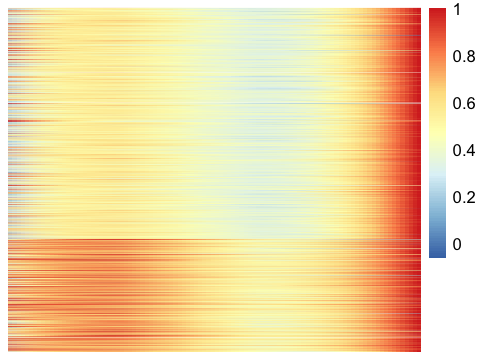

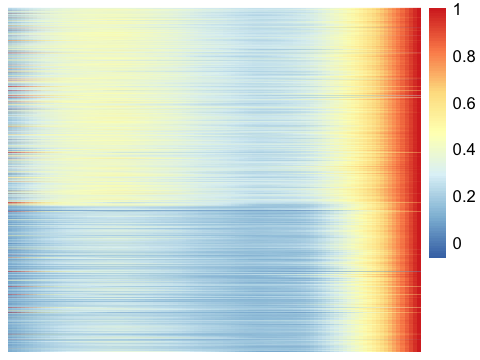

In [6]:
pk.scale.2 <- list()
dat.sub.2.scale.1 <- list()
for(i in 1:2){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.1[[i]] <- dat.sub.2.scale[pk.scale$pamobject$clustering==i,]
    pk.scale.2[[i]]<- pamk(dat.sub.2.scale.1[[i]],critout=T)
    print(table(pk.scale.2[[i]]$pamobject$clustering))
    pheatmap(dat.sub.2.scale.1[[i]][order(pk.scale.2[[i]]$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
}


### subsubclustering

2  clusters  0.4016882 
3  clusters  0.2797493 
4  clusters  0.2743529 
5  clusters  0.2498839 
6  clusters  0.2322411 
7  clusters  0.2038784 
8  clusters  0.2087968 
9  clusters  0.2024289 
10  clusters  0.2065883 

   1    2 
1142  521 
2  clusters  0.2526838 
3  clusters  0.3063449 
4  clusters  0.3379458 
5  clusters  0.3378959 
6  clusters  0.25576 
7  clusters  0.2206673 
8  clusters  0.2335762 
9  clusters  0.2347008 
10  clusters  0.2353688 

  1   2   3   4 
249  49 271 240 


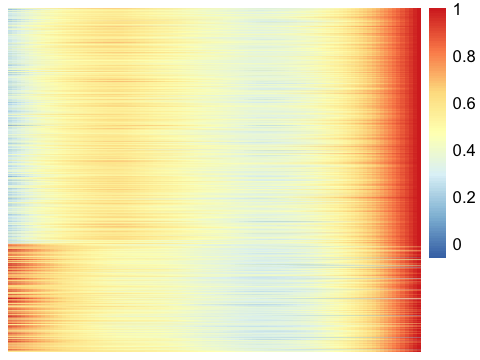

2  clusters  0.5068587 
3  clusters  0.2687925 
4  clusters  0.2561912 
5  clusters  0.2261906 
6  clusters  0.2372533 
7  clusters  0.2091667 
8  clusters  0.1815219 
9  clusters  0.1707579 
10  clusters  0.1869078 

   1    2 
1305  261 


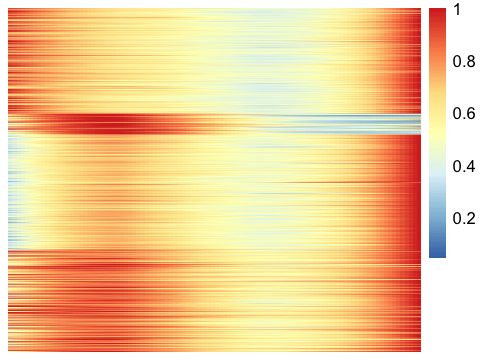

2  clusters  0.3667823 
3  clusters  0.2679969 
4  clusters  0.274777 
5  clusters  0.264089 
6  clusters  0.240597 
7  clusters  0.205193 
8  clusters  0.1913263 
9  clusters  0.2009016 
10  clusters  0.1950435 

  1   2 
395 758 


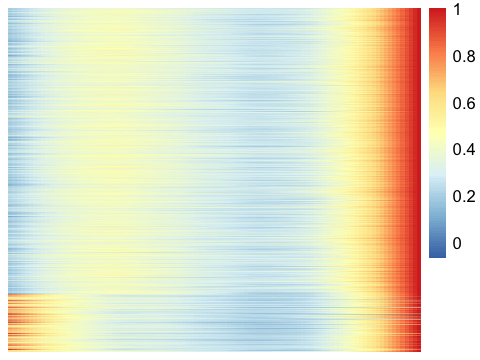

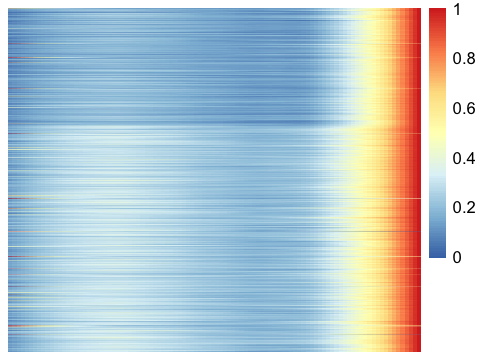

In [19]:
pk.scale.3 <- list(list(),list())
for(i in 1:2){
    for(j in 1:2){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.2 <- dat.sub.2.scale.1[[i]][pk.scale.2[[i]]$pamobject$clustering==j,]
    pk.scale.3[[i]][[j]]<- pamk(dat.sub.2.scale.2,critout=T)
    print(table(pk.scale.3[[i]][[j]]$pamobject$clustering))
    pheatmap(dat.sub.2.scale.2[order(pk.scale.3[[i]][[j]]$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
    }
}


In [33]:
# 
a=(pk.scale.3[[1]][[1]]$pamobject$clustering)
b1=ifelse(a==1,7,3)
names(b1)=names(a)

a=(pk.scale.3[[1]][[2]]$pamobject$clustering)
b2=ifelse(a==1,4,ifelse(a==2,1,ifelse(a==3,6,5)))
names(b2)=names(a)


a=(pk.scale.3[[2]][[1]]$pamobject$clustering)
b3=ifelse(a==1,8,2)
names(b3)=names(a)

a=(pk.scale.3[[2]][[2]]$pamobject$clustering)
b4=ifelse(a==1,10,9)
names(b4)=names(a)

final.ord = c(b1,b2,b3,b4)



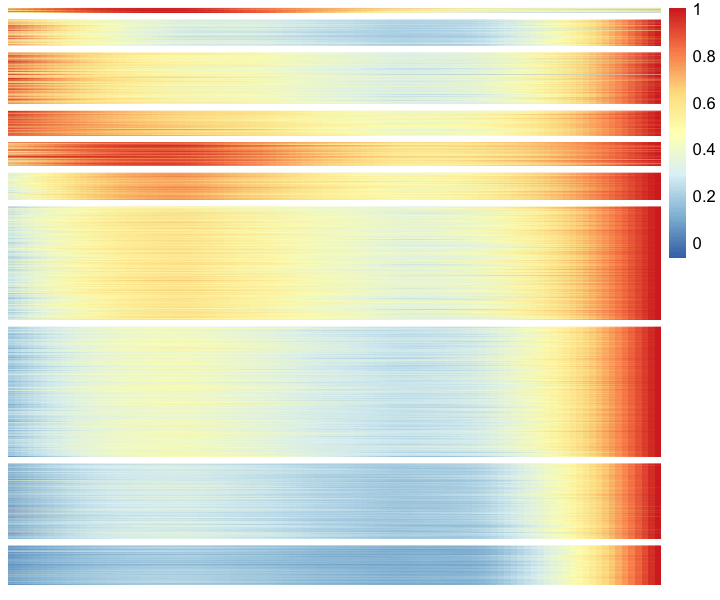

In [40]:
options(repr.plot.width=6, repr.plot.height=5)

pheatmap(dat.sub.2.scale[names(final.ord)[order(final.ord)],],
         gaps_row = as.numeric(cumsum(table(final.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [42]:
head(final.ord)

AAAS_28691   AAED1_127544 AASDHPPT_23418   ABCA1_127749   ABCB8_120111 
             7              7              3              7              3 
    ABCD3_5661 
             7

In [44]:
pk.list<-sapply(1:10,function(x)
        unique(unlist(sapply(names(which(final.ord==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)
                             

List of 10
 $ : chr [1:48] "ABCC8" "ABLIM2" "ACVR1" "ADCK1" ...
 $ : chr [1:259] "ACADVL" "ACSL1" "ADAM11" "ADK" ...
 $ : chr [1:519] "AASDHPPT" "ABCB8" "ABHD11" "AC020922.1" ...
 $ : chr [1:249] "AAMP" "AC007040.11" "AC024940.1" "AC026202.1" ...
 $ : chr [1:240] "ABHD17B" "ABI1" "ACSL3" "AHI1" ...
 $ : chr [1:269] "ABHD10" "ABHD12" "ABHD2" "ACAT2" ...
 $ : chr [1:1134] "AAAS" "AAED1" "ABCA1" "ABCD3" ...
 $ : chr [1:1286] "AAGAB" "AAMDC" "ABCA3" "ABCA5" ...
 $ : chr [1:754] "ABCB9" "ABCC10" "ABCF2" "ABCF3" ...
 $ : chr [1:390] "AATF" "ABHD2" "AC009403.2" "AC090616.2" ...


Loading required package: enrichR


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [45]:
for(i in 1:10){
    fn <- paste0("../dat/1901/dy.alpha.c",i,".enrichr.csv")
    fwrite(pk.list.gene.enrichr[[i]]%>%arrange(Adjusted.P.value),fn)
    system(paste0("open ",fn))
}
    

In [64]:
head(pk.list.gene.enrichr[[1]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[2]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[3]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[4]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[5]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of insulin secretion (GO:0050796),5/99,5,99,3.882228e-06,0.000883207,4.764584e-06,0.001083943,-1.298500,16.17815,SLC30A8;ABCC8;GCG;GCK;SYT7
regulation of peptide hormone secretion (GO:0090276),4/74,4,74,2.969966e-05,0.004504449,3.604834e-05,0.005467332,-1.840800,19.18919,ABCC8;GCG;GCK;SYT7
positive regulation of insulin secretion (GO:0032024),3/32,3,32,6.127752e-05,0.006970318,8.049664e-05,0.009156493,-1.707040,16.55846,SLC30A8;GCG;GCK
regulation of gluconeogenesis (GO:0006111),2/20,2,20,1.042493e-03,0.094866898,1.274001e-03,0.115934108,-1.964166,13.48624,PPARGC1A;GCK
regulation of hormone biosynthetic process (GO:0046885),1/8,1,8,1.904280e-02,0.152921653,2.156860e-02,0.162513584,-4.019847,15.92288,STC2
regulation of toll-like receptor 9 signaling pathway (GO:0034163),1/8,1,8,1.904280e-02,0.152921653,2.156860e-02,0.162513584,-3.943933,15.62218,RSAD2


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
heterochromatin organization (GO:0070828),3/10,3,10,0.0002408423,0.1708776,0.0007377219,0.4964953,-2.489370,20.739861,HP1BP3;SNAI1;MTHFR
regulation of histone methylation (GO:0031060),3/13,3,13,0.0005577113,0.1978481,0.0013995640,0.4964953,-2.689010,20.145174,NSD1;MTHFR;ZNF335
positive regulation of protein ubiquitination (GO:0031398),6/84,6,84,0.0007781613,0.2208422,0.0018113471,0.5140603,-1.380327,9.881177,DCUN1D4;TBC1D7;SPRTN;UBE3A;BIRC2;PTK2
dendritic spine morphogenesis (GO:0060997),3/17,3,17,0.0012761782,0.2542796,0.0027318561,0.5347254,-2.452742,16.344791,ARC;DLG4;CTNND2
"nuclear-transcribed mRNA catabolic process, deadenylation-dependent decay (GO:0000288)",5/64,5,64,0.0014335707,0.2542796,0.0030279022,0.5347254,-1.819160,11.911106,PDE12;CNOT11;SAMD4A;EXOSC3;EIF4B
mannose metabolic process (GO:0006013),2/8,2,8,0.0044430063,0.2606304,0.0084620952,0.5347254,-3.312346,17.941073,MAN2A2;MAN2C1


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
microtubule nucleation (GO:0007020),4/18,4,18,0.0010194790,0.2782889,0.002435358,0.6581796,-2.560112,17.635237,RANBP9;TUBGCP3;CLASP1;CLASP2
autophagosome organization (GO:1905037),7/57,7,57,0.0006473757,0.2782889,0.001475324,0.6581796,-2.227811,16.357892,NSFL1C;GABARAPL1;TP53INP1;ULK3;ATG2A;PIK3C3;TRAPPC8
mRNA metabolic process (GO:0016071),9/98,9,98,0.0009994461,0.2782889,0.002147163,0.6581796,-1.675784,11.576831,CPSF6;SON;NCBP2;DHX15;HNRNPR;RNASE4;PRKACA;ZFP36L2;HNRNPA0
autophagosome assembly (GO:0000045),7/59,7,59,0.0007990556,0.2782889,0.001767899,0.6581796,-1.494110,10.656110,NSFL1C;GABARAPL1;TP53INP1;ULK3;ATG2A;PIK3C3;TRAPPC8
regulation of neurogenesis (GO:0050767),7/58,7,58,0.0007200610,0.2782889,0.001616468,0.6581796,-1.298849,9.398696,PER2;NUMB;CTNNB1;HOOK3;NREP;YWHAG;ARNTL
negative regulation of fat cell differentiation (GO:0045599),5/33,5,33,0.0014894893,0.3404973,0.003116763,0.6581796,-1.672045,10.883876,BBS12;AXIN1;RORA;ZFP36L2;ARNTL


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
snRNA modification (GO:0040031),2/7,2,7,0.003111100,0.3099943,0.005297455,0.4510331,-3.400353,19.62949,MRPL1;MEPCE
positive regulation of hormone metabolic process (GO:0032352),2/7,2,7,0.003111100,0.3099943,0.005297455,0.4510331,-3.291088,18.99872,PAX8;ARNT
snRNA metabolic process (GO:0016073),3/19,3,19,0.001594127,0.3099943,0.002495389,0.4510331,-2.397844,15.44554,INTS12;MEPCE;INTS9
protein kinase B signaling (GO:0043491),4/36,4,36,0.001010097,0.3099943,0.001528454,0.4510331,-1.979496,13.65399,CREB1;CDKN1B;MDM2;PTEN
morphogenesis of an epithelium (GO:0002009),3/20,3,20,0.001858304,0.3099943,0.002843478,0.4510331,-2.071675,13.02688,TRAF3IP1;MPP5;VCL
cellular response to unfolded protein (GO:0034620),3/23,3,23,0.002808557,0.3099943,0.004061258,0.4510331,-2.048753,12.03660,PACRG;HSPH1;HSPA13


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
negative regulation of double-strand break repair via homologous recombination (GO:2000042),3/9,3,9,0.0001358962,0.04970405,0.0003548833,0.1297986,-2.648192,23.57849,HELB;FBXO18;POLK
negative regulation of potassium ion transport (GO:0043267),3/12,3,12,0.0003465484,0.09771464,0.0007145733,0.1742368,-2.246998,17.90293,NANOS1;PTK2B;NEDD4L
negative regulation of DNA recombination (GO:0045910),3/17,3,17,0.0010246675,0.17480817,0.0017123998,0.2543040,-2.144858,14.76389,HELB;FBXO18;POLK
negative regulation of double-strand break repair (GO:2000780),3/20,3,20,0.0016728054,0.17480817,0.0025902665,0.2561212,-2.281937,14.58900,HELB;FBXO18;POLK
regulation of stress-activated MAPK cascade (GO:0032872),4/42,4,42,0.0015826903,0.17480817,0.0022852627,0.2561212,-1.887746,12.17337,PHLPP1;COPS5;PDCD10;FOXO1
DNA conformation change (GO:0071103),3/19,3,19,0.0014345200,0.17480817,0.0022724928,0.2561212,-1.544353,10.11076,TOP2B;KAT6A;HMGB2


In [65]:
head(pk.list.gene.enrichr[[6]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[7]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[8]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[9]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[10]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
response to unfolded protein (GO:0006986),7/44,7,44,1.844717e-06,0.002743095,5.402417e-06,0.008033394,-1.571419,20.74774,HSPA1L;RHBDD1;HSPB1;HSPE1;HSPD1;HERPUD1;HSPA1A
regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway (GO:1902235),4/21,4,21,1.599266e-04,0.118905464,3.356627e-04,0.249565182,-2.091948,18.28529,BCL2L11;EIF2AK3;HERPUD1;HSPA1A
Rap protein signal transduction (GO:0032486),3/11,3,11,3.665214e-04,0.181672431,8.075490e-04,0.347389353,-2.515696,19.90281,RAP1B;RAP2B;RAPGEF2
'de novo' posttranslational protein folding (GO:0051084),4/31,4,31,7.565037e-04,0.224984205,1.249493e-03,0.371599261,-1.624908,11.67790,CCT2;HSPA1L;HSPE1;HSPA1A
positive regulation of RNA metabolic process (GO:0051254),4/36,4,36,1.343613e-03,0.314239541,2.068562e-03,0.469867033,-1.670435,11.04557,DYRK1A;HABP4;WDR75;HSPA1A
chaperone-mediated protein complex assembly (GO:0051131),3/18,3,18,1.690596e-03,0.314239541,2.750997e-03,0.469867033,-1.680777,10.72785,CCT2;HSPD1;HSPA1A


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
peptidyl-threonine dephosphorylation (GO:0035970),8/17,8,17,1.589212e-06,0.0006463686,4.440671e-05,0.01493398,-2.231230,29.79200,PPP2CA;PDP1;DUSP4;DUSP5;PPM1B;DUSP10;DUSP1;PPP1CA
peptidyl-tyrosine dephosphorylation (GO:0035335),9/26,9,26,7.564375e-06,0.0021004675,1.011519e-04,0.02834781,-2.413608,28.46141,DUSP4;DUSP5;DUSP10;DUSP1;DUSP28;PTPRJ;PTPN12;PTPN13;PTPN2
transforming growth factor beta receptor signaling pathway (GO:0007179),14/77,14,77,9.517505e-05,0.0160036843,5.325643e-04,0.09426387,-1.458248,13.50307,SMAD2;SMAD1;JUN;SMAD4;FOS;CBL;PRKCZ;SIRT1;RHOA;TGFBR2;DUSP22;UBC;UBA52;BMPR1A
positive regulation of cellular amide metabolic process (GO:0034250),12/62,12,62,1.599094e-04,0.0185439757,8.085362e-04,0.10451304,-2.090969,18.27696,FXR1;SMPD2;DDX3X;ROCK2;HNRNPD;RPL26;LARP4B;PASK;LARP4;CPEB3;CLU;PICALM
axonal transport (GO:0098930),9/37,9,37,1.713117e-04,0.0192040441,9.054242e-04,0.10451304,-1.557755,13.50889,FXR1;BLOC1S6;AP3D1;DTNBP1;AP3S1;TRAK1;AP3B2;HIF1A;TRAK2
positive regulation of cellular protein metabolic process (GO:0032270),15/92,15,92,1.946853e-04,0.0209332591,9.323197e-04,0.10451304,-1.428705,12.20704,CYFIP2;DDX3X;NR1H2;LARP4B;PASK;LARP4;FXR1;NFKBIA;ASPH;HNRNPD;VPS35;RPL26;EZR;CPEB3;BTRC


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of cytokinesis (GO:0032465),17/78,17,78,7.317061e-06,0.006265233,7.639227e-05,0.06541088,-2.239721,26.48538,PLK3;AHCTF1;PRKCE;VPS4A;KLHL21;PDXP;MYO19;RAB11A;CDC42;FLCN;SPAST;KIF13A;PIN1;BIRC6;CALM2;RAB11FIP4;GIT1
regulation of cell division (GO:0051302),14/66,14,66,6.336440e-05,0.024113676,4.075289e-04,0.15795896,-2.278730,22.02759,PLK3;AHCTF1;KLHL21;PDXP;MYO19;RAB11A;FLCN;KIF13A;CDK2AP2;PIN1;BIRC6;CALM2;RAB11FIP4;GIT1
negative regulation of response to endoplasmic reticulum stress (GO:1903573),8/23,8,23,5.864509e-05,0.024113676,4.992976e-04,0.15795896,-1.950476,19.00545,DNAJC3;PPP1R15B;CREB3;USP25;XBP1;SYVN1;TMBIM6;NCK1
nose development (GO:0043584),5/9,5,9,1.104540e-04,0.031525400,1.189257e-03,0.19865248,-3.214291,29.28512,SKI;SMCHD1;CHD7;PROX1;GLI3
negative regulation of G2/M transition of mitotic cell cycle (GO:0010972),13/63,13,63,1.544404e-04,0.037782745,8.117324e-04,0.19865248,-1.956789,17.17220,PSMD11;VPS4A;PINX1;RBX1;PSMA5;PSMD9;PSMD7;PSMC3;PSMA1;PSMC2;UBC;PSMD1;SKP1
regulation of cell cycle process (GO:0010564),16/91,16,91,2.072959e-04,0.039443811,9.935009e-04,0.19865248,-1.539678,13.05857,PLK3;AHCTF1;TIPIN;SPAG5;KLHL21;PDXP;MYO19;RAB11A;CDC42;FLCN;KIF13A;PIN1;BIRC6;CALM2;RAB11FIP4;GIT1


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
snRNA metabolic process (GO:0016073),5/19,5,19,0.0005623200,0.1183215,0.001570104,0.3303761,-2.389089,17.878603,INTS1;SNAPC2;INTS2;TUT1;INTS7
regulation of hippo signaling (GO:0035330),4/12,4,12,0.0007785165,0.1512119,0.002312867,0.3531976,-2.848454,20.389578,NEK8;DLG5;WWC3;NF2
"alternative mRNA splicing, via spliceosome (GO:0000380)",4/13,4,13,0.0010911265,0.1763821,0.002937485,0.3531976,-2.471855,16.859398,DDX17;HNRNPM;SFPQ;SRSF1
positive regulation of histone acetylation (GO:0035066),5/22,5,22,0.0011594616,0.1763821,0.002723170,0.3531976,-1.946310,13.156665,TADA2B;SMAD4;TADA2A;KAT7;PPARGC1A
negative regulation of type I interferon production (GO:0032480),7/45,7,45,0.0013693798,0.1819834,0.002786355,0.3531976,-1.470649,9.696570,RNF135;MAVS;ITCH;RNF216;TRAF3;CACTIN;RELB
protein ubiquitination involved in ubiquitin-dependent protein catabolic process (GO:0042787),9/71,9,71,0.0013499370,0.1819834,0.002619473,0.3531976,-1.263171,8.346655,ITCH;MAEA;UBE3C;ARIH2;SPOP;FBXO45;BTBD9;RNF5;ANAPC2


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of hematopoietic progenitor cell differentiation (GO:1901532),9/78,9,78,2.068818e-05,0.01252325,5.134913e-05,0.03108334,-2.327957,25.10923,PSMA3;YTHDF2;UBB;KMT2A;PSMB3;PSME3;PSMD3;PSMF1;PSMA7
regulation of hematopoietic stem cell differentiation (GO:1902036),9/77,9,77,1.861719e-05,0.01252325,4.683090e-05,0.03108334,-1.391143,15.15153,PSMA3;YTHDF2;UBB;KMT2A;PSMB3;PSME3;PSMD3;PSMF1;PSMA7
SCF-dependent proteasomal ubiquitin-dependent protein catabolic process (GO:0031146),9/73,9,73,1.199830e-05,0.01252325,3.195681e-05,0.03108334,-1.318821,14.94322,FBXL20;PSMA3;UBB;PSMB3;PSME3;PSMD3;PSMF1;PSMA7;FBXO31
regulation of stem cell differentiation (GO:2000736),9/89,9,89,5.973914e-05,0.02712157,1.305610e-04,0.05419470,-1.937209,18.84037,PSMA3;YTHDF2;UBB;KMT2A;PSMB3;PSME3;PSMD3;PSMF1;PSMA7
cellular response to nitrogen levels (GO:0043562),4/14,4,14,1.220672e-04,0.02737824,3.581148e-04,0.05419470,-2.374910,21.40017,BECN1;MAP1LC3B;MAP1LC3A;GABARAP
signal transduction in response to DNA damage (GO:0042770),5/26,5,26,1.289507e-04,0.02737824,3.147610e-04,0.05419470,-2.047062,18.33365,PAXIP1;USP10;SESN2;GRB2;TRIAP1


In [55]:
head(pk.list.gene.enrichr[[6]]%>%arrange(Adjusted.P.value)%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F)%>%
    filter(n.tot<=100))


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
